In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
data_size = 100
data = pd.DataFrame({
    'AQI': np.random.uniform(50, 150, data_size),
    'PM10': np.random.uniform(20, 80, data_size),
    'PM2.5': np.random.uniform(10, 50, data_size),
    'NO2': np.random.uniform(5, 40, data_size),
    'SO2': np.random.uniform(2, 20, data_size),
    'O3': np.random.uniform(10, 60, data_size),
    'Temperature': np.random.uniform(15, 35, data_size),
    'Humidity': np.random.uniform(30, 90, data_size),
    'Wind_Speed': np.random.uniform(0.5, 5.0, data_size),
    'HealthImpactScore': np.random.uniform(0, 100, data_size)  # Target
})

In [3]:
# Pisahkan fitur (X) dan target (y)
X = data[['AQI', 'PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'Wind_Speed']]
y = data['HealthImpactScore']

In [4]:
# Split data ke training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 5. Define Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

c:\Users\Fadika\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

In [8]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [9]:
# 6. Train the Model with Epochs
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,  # Number of epochs
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2911.2583 - mae: 46.3308 - val_loss: 2963.1951 - val_mae: 45.8527
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2512.6887 - mae: 42.9510 - val_loss: 2607.5195 - val_mae: 42.4915
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2390.4155 - mae: 40.3024 - val_loss: 2122.0557 - val_mae: 38.5480
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1699.4740 - mae: 33.2648 - val_loss: 1558.5751 - val_mae: 34.0528
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1228.2019 - mae: 28.8237 - val_loss: 1064.0531 - val_mae: 28.6118
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 626.6777 - mae: 21.6388 - val_loss: 853.7401 - val_mae: 24.2833
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 613.4061 - mae: 21.1121 - val_loss: 842.3212 - val_mae: 23.8902
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 584.4821 - mae: 20.6704 - val_loss: 843.8138 - val_mae: 24.3101
Epoch 9/100
4/

In [10]:
# 7. Evaluate the Model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")


Test Loss (MSE): 1086.57177734375
Test Mean Absolute Error (MAE): 26.98546600341797


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluasi Model pada Data Uji
y_pred = model.predict(X_test_scaled)

# Hitung Metrik Evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tampilkan Hasil Evaluasi
print("Evaluasi Akurasi Model pada Data Uji:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Evaluasi Akurasi Model pada Data Uji:
Mean Squared Error (MSE): 1086.57
Mean Absolute Error (MAE): 26.99
R-squared (R²): -0.53


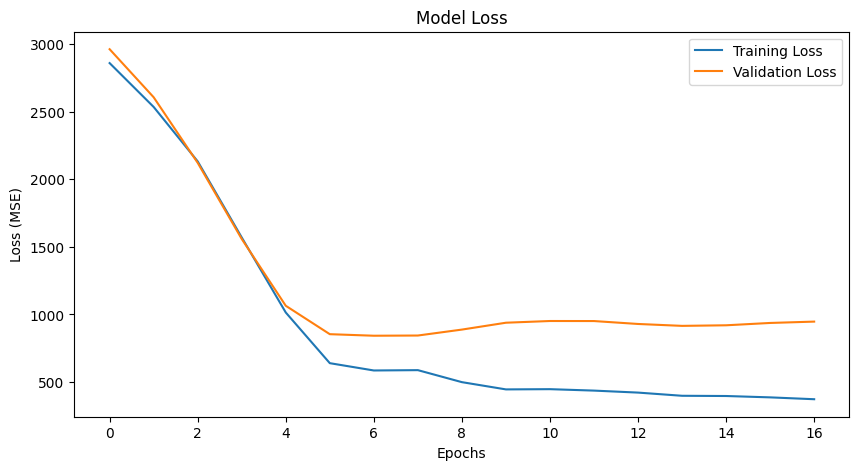

In [11]:
# 8. Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [12]:
# 9. Test the Model with New Data
new_data = np.array([[85, 40, 25, 30, 20, 15, 35, 60, 5]])  # Example feature values
new_data_scaled = scaler.transform(new_data)  # Scale new data
prediction = model.predict(new_data_scaled)
print("\nNew Data Features:", new_data[0])
print("Predicted Health Impact Score:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

New Data Features: [85 40 25 30 20 15 35 60  5]
Predicted Health Impact Score: 51.533337


c:\Users\Fadika\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MSE: 1133.5866745181459, R²: -0.3442843374075446


In [14]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}")

XGBoost - MSE: 1414.4671486666664, R²: -0.6773715468544625


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.09365565443638131
